Exercícios de Revisão
--
Professor: Renato Rocha Souza  
--

In [2]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import urllib
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import networkx as nx
%matplotlib inline

Em quais tipos de dados do Python (que você conhece) que se pode iterar (com o comando for, por exemplo)? Exemplifique para cada tipo.

Escreva uma função que receba um número romano e retorne o equivalente em algarismos indo-arábicos

#### Validação de CPF

O CPF é formado por 11 dígitos numéricos que seguem a máscara “###.###.###-##”, a verificação do CPF acontece utilizando os 9 primeiros dígitos e, com um cálculo simples, verificando se o resultado corresponde aos dois últimos dígitos (depois do sinal “-“).

Vamos usar como exemplo, um CPF fictício “529.982.247-25”.

#### Validação do primeiro dígito após o "-"

Primeiramente multiplicam-se os 9 primeiros dígitos pela sequência decrescente de números de 10 à 2 e soma os resultados. Assim:

    5 * 10 + 2 * 9 + 9 * 8 + 9 * 7 + 8 * 6 + 2 * 5 + 2 * 4 + 4 * 3 + 7 * 2

O resultado do nosso exemplo é: 295
    
O próximo passo da verificação também é simples, basta multiplicarmos esse resultado por 10 e dividirmos por 11.

    295 * 10 / 11

O resultado que nos interessa na verdade é o RESTO da divisão. Se ele for igual ao primeiro dígito verificador (primeiro dígito depois do ‘-‘), a primeira parte da validação está correta.

Observação Importante: Se o resto da divisão for igual a 10, nós o consideramos como 0.

Vamos conferir o primeiro dígito verificador do nosso exemplo. O resultado da divisão acima é ‘268’ e o RESTO é 2

Isso significa que o nosso CPF exemplo passou na validação do primeiro dígito.

#### Validação do segundo dígito após o "-"

A validação do segundo dígito é semelhante à primeira, porém vamos considerar os 9 primeiros dígitos, mais o primeiro dígito verificador, e vamos multiplicar esses 10 números pela sequencia decrescente de 11 a 2. Vejamos:

    5 * 11 + 2 * 10 + 9 * 9 + 9 * 8 + 8 * 7 + 2 * 6 + 2 * 5 + 4 * 4 + 7 * 3 + 2 * 2

O resultado é: 347

Seguindo o mesmo processo da primeira verificação, multiplicamos por 10 e dividimos por 11.

    347 * 10 / 11

Verificando o RESTO, como fizemos anteriormente, temos que o resultado da divisão é ‘315’ e o RESTO é 5

Verificamos, se o resto corresponde ao segundo dígito verificador. Com essa verificação, constatamos que o CPF 529.982.247-25 é válido.

Existe alguns casos de CPFs que passam nessa validação que expliquei, mas que ainda são inválidos. É os caso dos CPFs com dígitos repetidos (111.111.111-11, 222.222.222-22, …). Esses CPF atendem à validação, mas ainda são considerados inválidos.

#### Crie uma função que receba um CPF e diga se este é válido.

In [ ]:
import string

In [55]:
def verificador():
    CPF=str(input())
    lista=[]
    for i in range(0,len(CPF)):
        lista.append(CPF[i])
    CPF=''
    for j in range(0,len(lista)):
        if lista[j]=='1' or lista[j]=='2' or lista[j]=='3' or lista[j]=='4' or lista[j]=='5' or lista[j]=='6' or lista[j]=='7' or lista[j]=='8' or lista[j]=='9' or lista[j]=='0':
            CPF+=lista[j]
    #Teste do Primeiro dígito.
    k=CPF[0]
    Teste1=False
    Teste2=False
    Soma=0
    if CPF[1]==k and CPF[2]==k and CPF[3]==k and CPF[4]==k and CPF[5]==k and CPF[6]==k and CPF[7]==k and CPF[8]==k and CPF[9]==k and CPF[10]==k:
        return("CPF inválido")
    for i in range(0,9):
        Soma += (10-i)*int(CPF[i])
    Soma=(10*Soma)%11
    if Soma==10 and CPF[9] == '0':
        Teste1=True
    elif str(Soma)==CPF[9]:
        Teste1=True
    if Teste1==False:
        return("CPF inválido")
    #Teste do Segundo Dígito.
    Soma=0
    for i in range(0,10):
        Soma += (11-i)*int(CPF[i])
    Soma=(10*Soma)%11
    if Soma==10 and CPF[10] == '0':
        Teste2=True
    elif str(Soma)==CPF[10]:
        Teste2=True
    if Teste2==False:
        return("CPF inválido")
    print("CPF aprovado")

In [56]:
verificador()

529.982.247-25
CPF aprovado


Mostre graficamente que $ \sin ^2 x + \cos^2 x = 1. $  

Dica: para melhor visualização do gráfico, mude a escala dos eixos com $plt.axis([x_{min},x_{max},y_{min},y_{max}])$

(-1, 1.5)

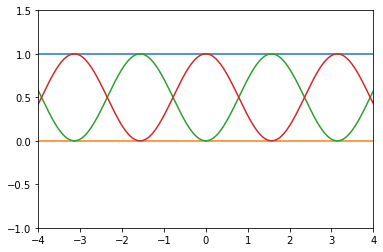

In [57]:
x = np.linspace(-100, 100, 10000)
y1 = np.sin(x)**2+np.cos(x)**2
y3 = np.zeros(10000)
y4 = np.sin(x)**2
y5 = np.cos(x)**2

plt.plot(x,y1)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)

axes = plt.gca()
axes.set_xlim([-4,4])
axes.set_ylim([-1,1.5])

Vamos testar se o módulo “random” gera mesmo números aleatórios?   
Escreva uma função que sorteie 10000 números de 1 a 10 e crie um gráfico (histograma) com a frequência de ocorrência de cada um deles.  

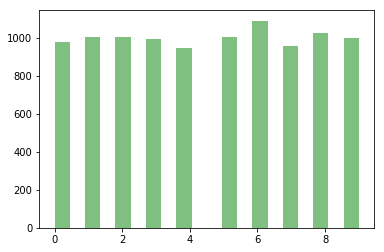

In [59]:
x = np.random.randint(0,10,10000)
plt.hist(x, 20, facecolor='g', alpha=0.5, histtype='stepfilled')
plt.show()

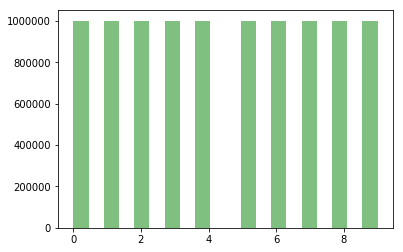

In [2]:
x = np.random.randint(0,10,10000000)
plt.hist(x, 20, facecolor='g', alpha=0.5, histtype='stepfilled')
plt.show()

Crie um histograma a partir de um dicionário de frequências

In [ ]:
from collections import Counter

frase = '''Uma frase qualquer em que as letras apareçam
em frequências diferentes e eu possa depois criar um histograma'''.lower()

lista = list(frase)
freqdist = Counter(lista)



(array([ 5.,  4.,  4.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([  1.  ,   1.75,   2.5 ,   3.25,   4.  ,   4.75,   5.5 ,   6.25,
          7.  ,   7.75,   8.5 ,   9.25,  10.  ,  10.75,  11.5 ,  12.25,
         13.  ,  13.75,  14.5 ,  15.25,  16.  ]),
 <a list of 20 Patch objects>)

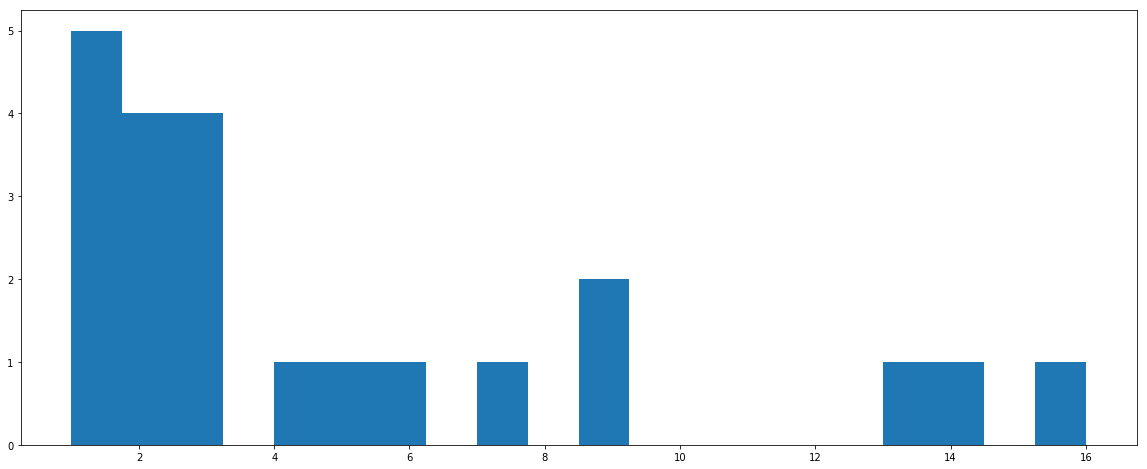

In [116]:
from collections import Counter

frase = '''Uma frase qualquer em que as letras apareçam
em frequências diferentes e eu possa depois criar um histograma'''.lower()

lista = list(frase)
freqdist = Counter(lista)

x,y = tuple(zip(*freqdist.items()))
#print(x)
#print(y)

fig, ax = plt.subplots(figsize=(20,8))
ax.hist(y, bins=20)

#ax.set_xticklabels(x)

In [102]:
freqdist

Counter({'\n': 1,
         ' ': 16,
         'a': 13,
         'c': 2,
         'd': 2,
         'e': 14,
         'f': 3,
         'g': 1,
         'h': 1,
         'i': 5,
         'l': 2,
         'm': 6,
         'n': 2,
         'o': 3,
         'p': 3,
         'q': 4,
         'r': 9,
         's': 9,
         't': 3,
         'u': 7,
         'ç': 1,
         'ê': 1})

Escreva uma função que gere uma lista com os n primeiros números primos.    

Escreva uma função que gere uma lista com os n primeiros números da sequência de fibonacci  

In [70]:
def fibonacci(n):
    aux=2
    lista=[1]
    if n==1:
        return(lista)
    elif n==2:
        lista.append(1)
        return(lista)
    else:
        lista.append(1)
        while aux<n:
            lista.append(lista[aux-2]+lista[aux-1])
            aux=aux+1
        return lista

In [71]:
fibonacci(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Escreva uma função que receba n listas de números e “plote” estas sequências em um único gráfico.

In [74]:
seq1 = [1,2,3,4,5,6]
seq2 = [8,6,5,2,3,1]
seq3 = [8,3,5,2,4,1]
seq4 = [3,7,9,2,4,8,7,5,3,7]

def plota_seq(*seqs):
    for seq in seqs:
        plt.plot(seq)
        
def plota_seq_lado_lado(*seqs):
    num = len(seqs)
    fig, ax = plt.subplots(nrows=1, ncols=num, figsize=(12,6))
    for idx, seq in enumerate(seqs):
        ax[idx].plot(seq)

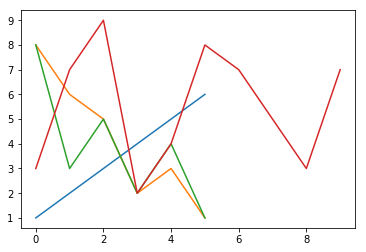

In [75]:
plota_seq(seq1,seq2,seq3, seq4)
#plota_seq_lado_lado(seq1,seq2,seq3, seq4)

Implemente funções em Python que tenham as mesmas funcionalidade dos comandos "range", "zip", "map", "filter" e "reduce"

In [119]:
#reduce

def my_reduce(funcao, seq):
    resultado = None
    while len(seq) > 1:
        resultado = funcao(seq[0],seq[1])
        seq = [resultado] + seq[2:]
    print(resultado)

In [120]:
fun = lambda x,y:x+y
seq1 = list(range(11))

my_reduce(fun,seq1)

55


Escreva uma função em Python que receba uma string e devolva quatro listas: uma com as palavras em minúsculas, outra com as palavras todas em maiúsculas, uma com as palavras que comecem em maiúsculas, e outra com o que não se encaixar nas listas anteriores.

In [95]:
import string
frase = '''Uma frase qualquer em @%$@#$ que 32342fedsae3423 as L8664 OKJHFV RFCDF letras apareçam
em frequências diferentes e eu possa depois criar um 12542658 $#@ˆ$ˆ%&%# histograma UTBVDFFR'''

In [106]:
def listas():
    a=[palavra for palavra in frase.split() if palavra.islower()]
    b=[palavra for palavra in frase.split() if palavra.isupper()]
    c=[palavra for palavra in frase.split() if palavra.istitle()]
    d=[palavra for palavra in frase.split() if not palavra.islower() and not palavra.isupper() and not palavra.istitle()]
    print(a)
    print(b)
    print(c)
    print(d)

In [107]:
listas()

['frase', 'qualquer', 'em', 'que', '32342fedsae3423', 'as', 'letras', 'apareçam', 'em', 'frequências', 'diferentes', 'e', 'eu', 'possa', 'depois', 'criar', 'um', 'histograma']
['L8664', 'OKJHFV', 'RFCDF', 'UTBVDFFR']
['Uma', 'L8664']
['@%$@#$', '12542658', '$#@ˆ$ˆ%&%#']


Escreva a sequência de comandos para extrair as palavras que se iniciem com maiúsculas de uma string utilizando no processo a função “filter”. O resultado deve ser uma lista.

In [109]:
string = 'Uma frase com Algumas palavras em Maiúsculo'
resultado=filter(str.istitle,string.split())
print(list(resultado))

['Uma', 'Algumas', 'Maiúsculo']


In [5]:
string = 'Uma frase com Algumas palavras em Maiúsculo'
resultado = filter(str.istitle,string.split())
print(list(resultado))

['Uma', 'Algumas', 'Maiúsculo']


Escreva uma função que receba uma lista de nomes e retorne um grafo que ligue os nomes que compartilham ao menos uma letra. Veja o código abaixo para exemplificar a geração de um grafo.
+ Mais informação em: https://networkx.github.io/documentation/stable/tutorial.html

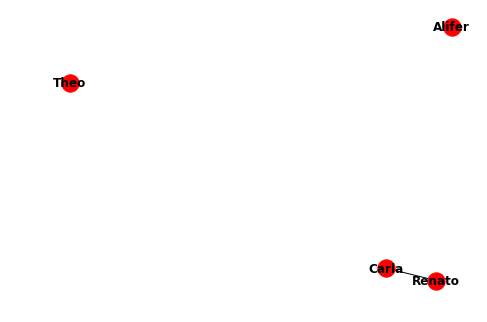

In [7]:
G = nx.Graph()
G.add_nodes_from(['Renato','Carla','Theo','Alifer'])
G.add_edge('Renato','Carla')
nx.draw(G, with_labels=True, font_weight='bold')

Uma das tarefas mais comuns no tratamento de dados não estruturados é a extração de informações em textos. Escreva uma função chamada “freqdist” que receba uma string e retorne um dicionário que contenha as palavras como chaves e suas frequências de ocorrência como valores. Use apenas a biblioteca padrão do Python.

In [112]:
import string
frase = '''Uma frase qualquer em que as letras apareçam
em frequências diferentes e eu possa depois criar um histograma'''
a=[palavra.lower().strip(string.punctuation) for palavra in frase.split()]
b={palavra:a.count(palavra) for palavra in a}
b

{'apareçam': 1,
 'as': 1,
 'criar': 1,
 'depois': 1,
 'diferentes': 1,
 'e': 1,
 'em': 2,
 'eu': 1,
 'frase': 1,
 'frequências': 1,
 'histograma': 1,
 'letras': 1,
 'possa': 1,
 'qualquer': 1,
 'que': 1,
 'um': 1,
 'uma': 1}

Uma técnica muito comum no estudo de linguagem natural é eliminar as palavras mais frequentes que não agregam muito ao texto, para "limpar" as análises; essas palavras são chamadas de "stopwords".  

Crie uma função chamada “remove_stopwords”que recebe um dicionário como o retornado pela função “freqdist”e uma lista de palavras a serem removidas e retorna um novo dicionário, com as devidas palavras removidas.  
Por exemplo:  

    distribuicao_de_frequencia = {'Era': 1, 'casa': 1, 'engra\xe7ada': 1,  'muito': 1, 'nada': 1, 'n\xe3o': 2, 'teto': 1, 'tinha': 2, 'uma': 1}
    stopwords = ['não', 'de', 'em', 'um', 'uma', 'para']
    nova_freqdist = remove_stopwords(distribuicao_de_frequencia, stopwords)
    print nova_freqdist
    {'casa': 1, 'engra\xe7ada': 1, 'era': 1, 'muito': 1, 'nada': 1, 'teto': 1, 'tinha': 2}
    
Nota: sua função não deve alterar o dicionário recebido! Ela deve retornar um novo dicionário com as palavras desejadas.

In [172]:
def limpeza(words,dic):
    dic2=dic.copy()
    print(dic2)
    for i in range(0,len(words)):
        if words[i] in dic2:
            dic2.pop(words[i])
    print(dic2)
    print(dic)

In [176]:
dic={'Era': 1, 'casa': 1, 'engra\xe7ada': 1,  'muito': 1, 'nada': 1, 'n\xe3o': 2, 'teto': 1, 'tinha': 2, 'uma': 1}
words=['não', 'de', 'em', 'um', 'uma', 'para']

In [177]:
limpeza(words,dic)

{'Era': 1, 'uma': 1, 'nada': 1, 'engraçada': 1, 'muito': 1, 'tinha': 2, 'não': 2, 'casa': 1, 'teto': 1}
{'Era': 1, 'nada': 1, 'engraçada': 1, 'muito': 1, 'tinha': 2, 'casa': 1, 'teto': 1}
{'engraçada': 1, 'não': 2, 'muito': 1, 'teto': 1, 'uma': 1, 'tinha': 2, 'Era': 1, 'casa': 1, 'nada': 1}


Escreva uma função que extraia todos os links da url abaixo.

In [8]:
url = 'http://ppgci.eci.ufmg.br/pessoas/professores/permanentes'

In [9]:
pagina = requests.get(url)
texto = pagina.text
#soup = BeautifulSoup(texto)
#print(texto)

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:
- Identificar os candidatos a nomes próprios do texto e a frequência com que aparecem;
- Identificar as 5 palavras mais comuns;
- Identificar os tritongos;

- Salvar os resultados em um arquivo chamado "respostas.txt" no computador

In [10]:
from bs4.element import Comment

#url = 'http://norvig.com/big.txt'
url = 'http://ppgci.eci.ufmg.br/pessoas/professores/permanentes'

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

page = requests.get(url)
html = page.text
sopa = bs(html, "lxml")
texts = sopa.findAll(text=True)
visible_texts = list(filter(tag_visible, texts))
#visible_texts

In [11]:
nomes_proprios = list(filter(str.istitle,visible_texts))
nomes_proprios

['Página Inicial',
 'Professores',
 'Permanentes',
 'Busca',
 'Busca Avançada…',
 'Acessibilidade',
 'Objetivos',
 'Avaliação ',
 'Coordenação',
 'Orientação',
 'Regulamento',
 'Resoluções',
 'Mestrado',
 'Doutorado',
 'Especialização',
 'Seleção Mestrado',
 'Seleção Doutorado',
 'Professores',
 'Permanentes',
 'Secretaria',
 'Matrículas',
 'Formulários',
 'Info',
 '\n                    Permanentes\n                ',
 'Adriana Bogliolo Sirihal Duarte',
 'Adriana Bogliolo Sirihal Duarte - ',
 'Carlos Alberto Ávila Araújo',
 'Carlos Alberto Ávila Araújo - ',
 'Cíntia Aparecida Chagas Arreguy',
 'Cíntia Aparecida Chagas Arreguy - ',
 'Cristina Dotta Ortega',
 'Cristina Dotta Ortega - ',
 'Helena Maria Tarchi Crivellari',
 'Helena Maria Tarchi Crivellari - ',
 'Ivana Denise Parrela',
 'Ivana Denise Parrela - ',
 'Lígia Maria Moreira Dumont',
 'Lígia Maria Moreira Dumont - ',
 'Maria Aparecida Moura',
 'Maria Aparecida Moura - ',
 'Mônica Erichsen Nassif',
 'Mônica Erichsen Nassif - ',
 '

Escreva um programa em Python que:
+ Leia o arquivo em:  
  https://raw.githubusercontent.com/rsouza/FGV_Programming_Languages/master/Python/Dados/numero_mil_digitos.txt
+ Some 1 (um) a cada dígito do arquivo (se for 9, vira 0), e;
+ Salve o arquivo novamente no seu disco rígido com o nome de “resultado.txt”.

+ Lembre-se dos métodos de arquivo: read(), readline(), readlines() e write().

Lembre-se, também, do caractere especial <newline> (\n).
Finalmente, lembre-se do pacote “requests”, se quiser automatizar a leitura do arquivo na web.

In [67]:
url = 'https://raw.githubusercontent.com/rsouza/FGV_Programming_Languages/master/Python/Dados/numero_mil_digitos.txt'
pagina = requests.get(url)
texto = pagina.text

In [68]:
with open('resultado.txt','w') as f:
    f.write(texto)

Escreva uma função (ou conjunto de funções) que extraia(m) todos os endereços de e-mail de uma página web (passada como parâmetro) e os devolva em uma lista. Considere apenas e-mails:  
- De domínios do Brasil ('.br') ou;  
- De domínios de alto nível originais ('.com', '.org', '.net', '.int', '.edu', '.gov', '.mil').

In [73]:
url = 'http://emap.fgv.br/corpo-docente/walter-wagner-carvalho-sande-professor-assistente'
pagina = requests.get(url)
texto = pagina.text

soup = bs(texto, 'lxml')
emails = [a["href"] for a in soup.select('a[href^=mailto:]')]
emails

['mailto:walter.sande@fgv.br']

In [ ]:
url = 'http://emap.fgv.br/corpo-docente/vincent-gerard-yannick-guigues'
pagina = requests.get(url)
texto = pagina.text

In [81]:
texto.count('mailto:')

1

In [85]:
inicio = texto.find('mailto:') + 7
texto[inicio:inicio + texto[inicio:].find('"')]

'vincent.guigues@fgv.br'

In [89]:
import re
re1 = r'[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+[a-zA-Z]'
re2 = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"

In [91]:
re.findall(re1, texto)

['vincent.guigues@fgv.br', 'vincent.guigues@fgv.br']

Escreva uma função que possua o mesmo comportamento do gerador (x**2 for x in range(100))

In [204]:
def ger_teste():
    for x in range(100):
        yield x**2

Uma progressão aritmética (PA) é um sequência numérica em que cada termo, a partir do segundo, é igual à soma do termo anterior com uma constante R positiva (denominada razão).  

A fórmula geral de uma PA é:  $an = a1 + (n - 1) * R$    

Escreva uma função que receba uma lista com um conjunto de números inteiros positivos, identifique todos os subconjuntos de no mínimo 3 elementos desta lista onde os números formem uma progressão aritmética. Devem ser apresentados sempre os maiores subconjuntos que formem uma PA. Por exemplo, dado a lista [1,2,3,5,6,7,9] teríamos como resultado:  

[[1,2,3], [5,6,7], [1,3,5,7,9], [3,6,9], [1,5,9]]  

Note que, por exemplo, a sequência [1,3,5] não deve ser apresentada, porque já faz parte de [1,3,5,7,9].  

Uma permutação é um arranjo ordenado de objetos. Por exemplo, $ 3124 \ $ é uma das possíveis permutações dos dígitos $1, 2, 3$ e $4$. Se todas as permutações são ordenadas numericamente, chamamos a este arranjo de ordem lexicográfica. As permutações lexicográficas de $0, 1$ e $2$ são:  

$012\;021\;102\;120\;201\;210$    

Qual o milionésimo elemento da ordenação lexicográfica dos dígitos $0, 1, 2, 3, 4, 5, 6, 7, 8$ e $9$?   

In [12]:
from itertools import combinations
lis = [1, 2, 3, 4]
list(combinations(lis, 3))

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]

In [16]:
#Código do Itertools

def permutations(iterable, r=None):
    # permutations('ABCD', 2) --> AB AC AD BA BC BD CA CB CD DA DB DC
    # permutations(range(3)) --> 012 021 102 120 201 210
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    if r > n:
        return
    indices = list(range(n))
    cycles = list(range(n, n-r, -1))
    yield tuple(pool[i] for i in indices[:r])
    while n:
        for i in reversed(list(range(r))):
            cycles[i] -= 1
            if cycles[i] == 0:
                indices[i:] = indices[i+1:] + indices[i:i+1]
                cycles[i] = n - i
            else:
                j = cycles[i]
                indices[i], indices[-j] = indices[-j], indices[i]
                yield tuple(pool[i] for i in indices[:r])
                break
        else:
            return

In [18]:
list(permutations('012',3))

[('0', '1', '2'),
 ('0', '2', '1'),
 ('1', '0', '2'),
 ('1', '2', '0'),
 ('2', '0', '1'),
 ('2', '1', '0')]

In [9]:
%%time

#permutações mais simples
from IPython.display import clear_output

validos = []
count = 0
for i in range(123456789,9876543211):
    if '0' not in str(i):
        if len(set(list(str(i)))) == 9:
            validos.append('0'+ str(i))
            #print('0'+ str(i))
            count += 1
    else:
        if len(set(list(str(i)))) == 10:
            validos.append(str(i))
            #print(str(i))
            count += 1
    #if count%100 == 1:
    #    clear_output()
    if count > 10000:
        break
print(validos[9999])

0139846572
CPU times: user 42 s, sys: 0 ns, total: 42 s
Wall time: 42.1 s


No semestre passado manipulamos textos usando Shell do linux.  
Implemente no Python funções para ler um arquivo e:  
- Contar a quantidade de palavras que começam com letras maiúsculas;  
- Contar quantas palavras contém sequências de três vogais (tritongos);  
- Salvar no arquivo “resultados.txt” as linhas que começam e terminam com uma não vogal.

Implemente em Python uma classe chamada “Tamagotchi” com as seguintes propriedades:  
- Tem métodos para dizer a idade, se está com fome e se está de bom humor  
- Fica com fome após 5 minutos depois de comer, e fica de mau humor se não bricarem com ele em 10 minutos
- Se comunica com um conjunto de mensagens predefinidas e aleatórias, dependendo do humor e da fome 
- "Morre" se ficar com fome por mais de 10 minutos (os métodos deixarão de funcionar)

Implemente em Python a classe quadrilátero, que recebe o tamanho dos lados ao ser instanciada. Implemente as classes retângulo, quadrado, losango e trapézio, derivadas da classe quadrilátero, com os métodos para área e perímetro.


Implemente em Python uma classe chamada “Navio” com as seguintes propriedades:  
- Quando instanciado, tem o tanque cheio e está nas coordenadas 0,0.  
- Possui um tanque de diesel com capacidade de 600.000 litros.  
- Consome 13.700 litros por hora, numa velocidade de 37 Km/h.  
- Possui o metodo “navegar”, que recebe as coordenadas de destino. Esse método calcula a distância a navegar e avalia se o navio possui combustível para chegar nestas coordenadas.  
- Possui métodos para encher o tanque, dizer a autonomia, retornar o total de km navegados desde que encheu o tanque e desde que foi instanciado.  

OBS: Considere que um grau de latitude sempre corresponde a uma distância de 111,12 Km. Embora não seja verdade, considere que um grau de longitude corresponde à mesma distância.  

O problema de Monty Hall, também conhecido por paradoxo de Monty Hall é um problema matemático e paradoxo que surgiu a partir de um concurso televisivo dos Estados Unidos chamado "Let’s Make a Deal", exibido na década de 1970. O jogo consiste no seguinte: Monty Hall (o apresentador) apresentava 3 portas aos concorrentes, sabendo que atrás de uma delas está um carro (prêmio bom) e que as outras têm prêmios de pouco valor.

- Na 1ª etapa o concorrente escolhe uma porta (que ainda não é aberta);  
- Em seguida, Monty abre uma das outras duas portas que o concorrente não escolheu, sabendo de antemão que o carro não se encontra na porta que abrirá;  
- Agora com duas portas apenas para escolher — pois uma delas já se viu, na 2ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma delas, o concorrente tem que se decidir se permanece com a porta que escolheu no início do jogo e abre-a ou se muda para a outra porta que ainda está fechada para então a abrir.  

Demonstre graficamente que é mais provável ganhar o prêmio se trocar de porta do que se não o fizer. Quais as probabilidade de acertar, em ambos os casos?

Você sabe jogar pôquer? Vamos criar um jogo virtual...  
a) Crie uma classe chamada “Baralho”, com as cartas dos naipes de Paus, Copas, Ouros e Espadas, cada naipe possuindo cartas que variam de 1 a 13.  
Esta classe deve possuir o método “embaralhar”. Quando instanciado, o baralho deve chamar este método, gerando uma uma ordem aleatória para estas 52 cartas.  

Dica: gerar um baralho com o comando [str(x)+str(y) for x,y in list(itertools.product('PCOE',range(1,14)))]  

b) Crie uma classe chamada “Jogador”, que seja iniciada com cinco cartas, e retorne o valor da “mão” (veja a primeira coluna da tabela a seguir)  

c) Crie uma classe chamada “Jogo”, que recebe uma instância de Baralho e $n$ instâncias de jogador. Esta classe deve ser capaz de:  

- Distribuir cartas de um baralho embaralhado para $n$ jogadores, 5 cartas para cada um e;  
- Anunciar o ganhador da rodada (aquele com o maior número no valor da mão).  

A hierarquia de “mãos” do pôquer é a seguinte (todos os naipes possuem o mesmo valor):

In [30]:
nomes = {'Nome da Jogada':['Royal Straight Flush',
                           'Straight Flush',
                           'Four of a kind',
                           'Full House',
                           'Flush',
                           'Straight',
                           'Three of a kind',
                           'Two Pairs',
                           'One Pair',
                           'High Card'],
         'Descrição':['5 cartas seguidas do mesmo naipe até o Ás', 
                      '5 cartas seguidas do mesmo naipe que não seja até ao Ás',
                      'Quatro cartas iguais',
                      'Uma trinca e um par',
                      '5 cartas do mesmo naipe não seguidas',
                      '5 cartas seguidas de naipes diferentes',
                      '3 cartas iguais',
                      '2 pares de cartas',
                      '2 cartas iguais',
                      'Ganha quem tiver a carta mais alta'],
         'Combinações possíveis':[4,36,624,3744,5108,10200,54912,123552,1098240,1302540]}

df = pd.DataFrame(nomes, columns=['Nome da Jogada','Descrição','Combinações possíveis'])
df

,Nome da Jogada,Descrição,Combinações possíveis
0,Royal Straight Flush,5 cartas seguidas do mesmo naipe até o Ás,4
1,Straight Flush,5 cartas seguidas do mesmo naipe que não seja ...,36
2,Four of a kind,Quatro cartas iguais,624
3,Full House,Uma trinca e um par,3744
4,Flush,5 cartas do mesmo naipe não seguidas,5108
5,Straight,5 cartas seguidas de naipes diferentes,10200
6,Three of a kind,3 cartas iguais,54912
7,Two Pairs,2 pares de cartas,123552
8,One Pair,2 cartas iguais,1098240
9,High Card,Ganha quem tiver a carta mais alta,1302540


In [10]:
from random import shuffle

class Baralho:
    def embaralha(self):
        self.baralho = [str(x)+str(y) for x,y in list(itertools.product('PCOE',range(1,14)))]
        random.shuffle(self.baralho)
        
    def __init__(self):
        self.embaralha()
        
    def show(self):
        print(self.baralho)
        
    def da_cartas(self,num):
        if num <= len(self.baralho):
            cartas = []
            for i in range(num):
                cartas.append(self.baralho.pop())
            return cartas
        else:
            print('Não há cartas suficientes')

In [24]:
b1 = Baralho()
b1.show()

['C12', 'C5', 'O12', 'E8', 'P11', 'O2', 'C2', 'C13', 'P5', 'E4', 'P12', 'C9', 'O8', 'E10', 'P3', 'O1', 'C6', 'C10', 'P1', 'O7', 'O10', 'C4', 'P2', 'O3', 'O5', 'P4', 'C8', 'P13', 'O11', 'E13', 'C7', 'C1', 'O9', 'O4', 'E12', 'P6', 'E3', 'P9', 'O13', 'E9', 'P8', 'P7', 'E6', 'P10', 'E7', 'E2', 'E11', 'E5', 'E1', 'O6', 'C3', 'C11']


In [25]:
b1.da_cartas(10)

['C11', 'C3', 'O6', 'E1', 'E5', 'E11', 'E2', 'E7', 'P10', 'E6']

In [26]:
b1.show()

['C12', 'C5', 'O12', 'E8', 'P11', 'O2', 'C2', 'C13', 'P5', 'E4', 'P12', 'C9', 'O8', 'E10', 'P3', 'O1', 'C6', 'C10', 'P1', 'O7', 'O10', 'C4', 'P2', 'O3', 'O5', 'P4', 'C8', 'P13', 'O11', 'E13', 'C7', 'C1', 'O9', 'O4', 'E12', 'P6', 'E3', 'P9', 'O13', 'E9', 'P8', 'P7']


In [27]:
b1.embaralha()

In [28]:
b1.show()

['C8', 'P6', 'P7', 'E13', 'C1', 'C6', 'P13', 'E5', 'E1', 'P4', 'O10', 'O8', 'E9', 'P9', 'P8', 'C11', 'O12', 'O4', 'O5', 'E2', 'P12', 'O3', 'P2', 'C9', 'C4', 'E10', 'E4', 'C10', 'O11', 'C12', 'P11', 'P3', 'O9', 'C3', 'P5', 'C7', 'C2', 'O6', 'O1', 'E3', 'P1', 'E8', 'E6', 'O2', 'P10', 'O7', 'E12', 'O13', 'E7', 'C5', 'E11', 'C13']


In [31]:
class Jogador:
    def __init__(self,name):
        self.cartas = []
        self.name = name
        
    def recebe_cartas(self, cartas):
        self.cartas = cartas
        
    def mostra_cartas(self):
        return self.cartas
    
    def valor_mao(self):
        return max([int(c[1:]) for c in self.cartas])  #implementar função de valor da mão

In [36]:
class Jogo:
    def __init__(self, baralho, *jogadores):
        self.jogadores = [j for j in jogadores]
        self.baralho = baralho
        
    def jogada(self):
        self.baralho.embaralha()
        for jogador in self.jogadores:
            jogador.recebe_cartas(self.baralho.da_cartas(5))
            print('Jogador {} possui cartas {}'.format(jogador.name, jogador.mostra_cartas()))
            print('Valor da mão: {}\n'.format(jogador.valor_mao()))

In [37]:
jogador1 = Jogador('Renato')
jogador2 = Jogador('Matheus')
jogador3 = Jogador('Breno')
jogador4 = Jogador('Lucas')
banca = Jogador('Banca')
b2 = Baralho()
jogo1 = Jogo(b2, jogador1, jogador2, jogador3, jogador4, banca,)

In [121]:
jogo1.jogada()

Jogador Renato possui cartas ['E11', 'C10', 'E7', 'O13', 'O9']
Valor da mão: 13

Jogador Matheus possui cartas ['P7', 'P3', 'E2', 'O7', 'O8']
Valor da mão: 8

Jogador Breno possui cartas ['C1', 'O10', 'P10', 'P4', 'E4']
Valor da mão: 10

Jogador Lucas possui cartas ['E13', 'C5', 'O11', 'E12', 'P9']
Valor da mão: 13

Jogador Banca possui cartas ['C6', 'C4', 'P2', 'O4', 'P13']
Valor da mão: 13



In [122]:
jogo1.jogada()

Jogador Renato possui cartas ['O7', 'O6', 'O10', 'C5', 'E13']
Valor da mão: 13

Jogador Matheus possui cartas ['E9', 'O4', 'O12', 'E2', 'O2']
Valor da mão: 12

Jogador Breno possui cartas ['C10', 'C7', 'P1', 'E8', 'E6']
Valor da mão: 10

Jogador Lucas possui cartas ['E10', 'P10', 'C9', 'C13', 'C1']
Valor da mão: 13

Jogador Banca possui cartas ['P12', 'C8', 'E1', 'O8', 'P5']
Valor da mão: 12



## Mega Sena

### Como Jogar

A Mega-Sena paga milhões para o acertador dos 6 números sorteados. Ainda é possível ganhar prêmios ao acertar 4 ou 5 números dentre os 60 disponíveis no volante de apostas. Para realizar o sonho de ser o próximo milionário, você deve marcar de 6 a 15 números do volante.

#### Apostas

A aposta mínima é de 6 números e a máxima é de 15 números.

#### Premiação

São premiados os:

- acertadores dos 6 números sorteados (Sena);

- acertadores de 5 números (Quina);

- acertadores de 4 números (Quadra);

Crie uma função **apostar** que receba números de 6 a 15 números diferentes entre 1 e 60. Caso a aposta seja válida, sua função deve adicionar a aposta à um container (lista, tupla, ...) **apostas**. Caso contrário, indique qual foi o erro.

Crie uma função **megasena** que não receba argumentos. Ela deve realizar o sorteio de 6 números diferentes entre 1 e 60 e indicar quantas apostas foram vencedoras da sena, da quina e da quadra. 

Lembre-se que o vencedor da sena não é considerado vencedor da quina e assim por diante. 

Dica: O **randrange** da biblioteca **random** pode ser útil.

Crie uma função **apostador** que recebe um argumento **num_apostas**. A função deve retornar um *container* contendo **num_apostas** apostas.

Por exemplo: Ao chamar a função **apostador(10)**, deve ser retornado uma container com 10 apostas.

Cada aposta pode conter a quantidade de números que você desejar, desde que seja entre 6 e 15 números.